In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [26]:
df = pd.read_csv('bank.csv')

In [27]:
## process categorical values
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [28]:
## convert result column - deposit to 0/1
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

In [29]:
## deal with categorical data type
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
df_matrix = df.copy()
for col in cat_col:
    df_cat = df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix.drop(col,axis=1,inplace=True)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
num_col = ['age','balance','duration','pdays','previous','campaign']

for col in num_col:
    df_col = df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())


In [31]:
df_matrix.head()

,age,balance,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.532468,0.104371,0.268110,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.493506,0.078273,0.377675,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.298701,0.092185,0.357566,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.480519,0.105882,0.148750,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.467532,0.079851,0.172983,0.016129,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
df_Y = df_matrix['deposit']
df_X = df_matrix.drop('deposit',axis = 1)

In [33]:
# prepare training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


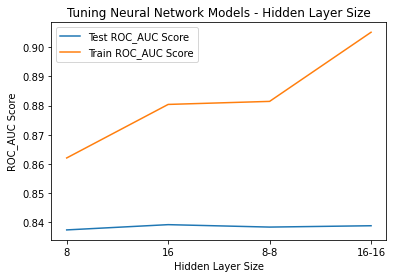

In [36]:
# Decision Tree
from sklearn.neural_network import MLPClassifier
train_performance = []
test_performance = []
hidden_layers = [(8,),(16,),(8,8),(16,16)]
for n in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=n)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))
hidden_layer_label = ['8','16','8-8','16-16']
plt.plot(hidden_layer_label,test_performance,label = "Test ROC_AUC Score")
plt.plot(hidden_layer_label,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Hidden Layer Size')
plt.title('Tuning Neural Network Models - Hidden Layer Size')
plt.legend(loc='best')
plt.show()

/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/o

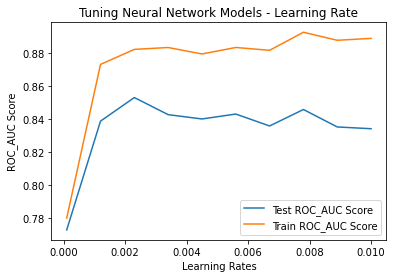

In [37]:
train_performance = []
test_performance = []
learning_rate_inits = np.linspace(0.0001, 0.01, 10)
for n in learning_rate_inits:
    mlp = MLPClassifier(hidden_layer_sizes=(8,), learning_rate_init = n)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))
    
plt.plot(learning_rate_inits,test_performance,label = "Test ROC_AUC Score")
plt.plot(learning_rate_inits,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Learning Rates')
plt.title('Tuning Neural Network Models - Learning Rate')
plt.legend(loc='best')
plt.show()

/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yaoxiao/o

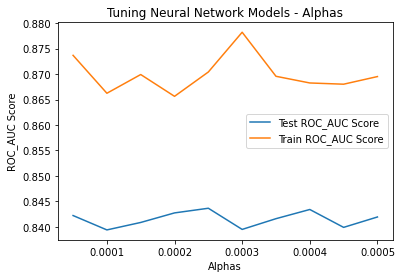

In [38]:
train_performance = []
test_performance = []
alphas = np.linspace(0.00005, 0.0005, 10)
for n in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=(8,),learning_rate_init = 0.001, alpha = n)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(alphas,test_performance,label = "Test ROC_AUC Score")
plt.plot(alphas,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Alphas')
plt.title('Tuning Neural Network Models - Alphas')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'ROC_AUC Score')

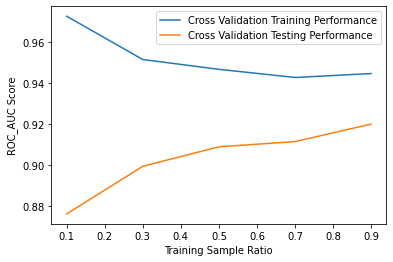

In [39]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(8,),learning_rate_init = 0.002, alpha = 0.00025)
    cv = cross_validate(mlp,X_train,y_train,cv=5, scoring='roc_auc',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('ROC_AUC Score')

In [40]:
loan_df = pd.read_csv('Training_Data.csv')

In [41]:
loan_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [42]:
## deal with categorical data type
cat_col = ['Married/Single','House_Ownership','Car_Ownership','Profession','STATE']
df_matrix = loan_df['Risk_Flag']
for col in cat_col:
    df_cat = loan_df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)


In [43]:
num_col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
for col in num_col:
    df_col = loan_df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())


In [44]:
df_Y = df_matrix['Risk_Flag']
df_X = df_matrix.drop('Risk_Flag',axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, stratify=df_Y, random_state=42)

(32,)


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(32, 16, 8)


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(64, 32, 16, 8)


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(128, 64, 32, 16, 8)


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


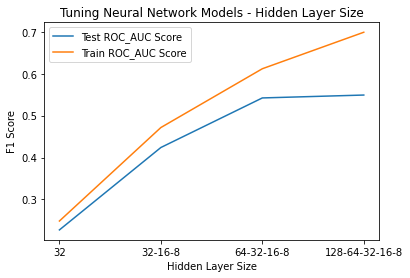

In [49]:
from sklearn.neural_network import MLPClassifier
train_performance = []
test_performance = []
hidden_layers = [(32,),(32,16,8),(64,32,16,8),(128,64,32,16,8)]
for n in hidden_layers:
    print(n)
    mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=100)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))
hidden_layer_label = ['32','32-16-8','64-32-16-8','128-64-32-16-8']
plt.plot(hidden_layer_label,test_performance,label = "Test ROC_AUC Score")
plt.plot(hidden_layer_label,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('F1 Score')
plt.xlabel('Hidden Layer Size')
plt.title('Tuning Neural Network Models - Hidden Layer Size')
plt.legend(loc='best')
plt.show()

0.0001


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.002575


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.005050000000000001


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.007525000000000001


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.01


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


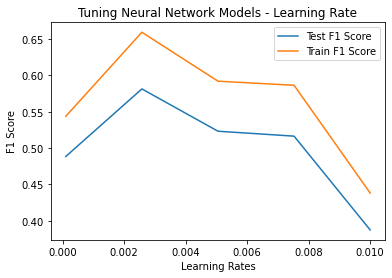

In [50]:
train_performance = []
test_performance = []
learning_rate_inits = np.linspace(0.0001, 0.01, 5)
for n in learning_rate_inits:
    print(n)
    mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8), learning_rate_init = n, max_iter=100)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))
    
plt.plot(learning_rate_inits,test_performance,label = "Test F1 Score")
plt.plot(learning_rate_inits,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Learning Rates')
plt.title('Tuning Neural Network Models - Learning Rate')
plt.legend(loc='best')
plt.show()

5e-05


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0001625


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.000275


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.00038750000000000004


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0005


/Users/yaoxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


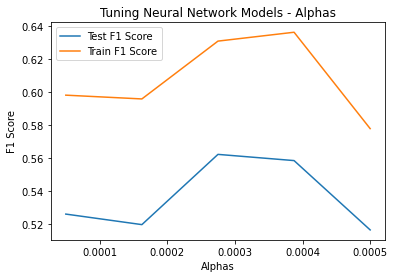

In [51]:
train_performance = []
test_performance = []
alphas = np.linspace(0.00005, 0.0005, 5)
for n in alphas:
    print(n)
    mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8),learning_rate_init = 0.003, alpha = n, max_iter=100)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(alphas,test_performance,label = "Test F1 Score")
plt.plot(alphas,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Alphas')
plt.title('Tuning Neural Network Models - Alphas')
plt.legend(loc='best')
plt.show()

In [52]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8),learning_rate_init = 0.003, alpha = 0.0003, max_iter=100)
    cv = cross_validate(mlp,X_train,y_train,cv=5, scoring='f1',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))


0.1
0.3
0.5
0.7
0.9


Text(0, 0.5, 'F1 Score')

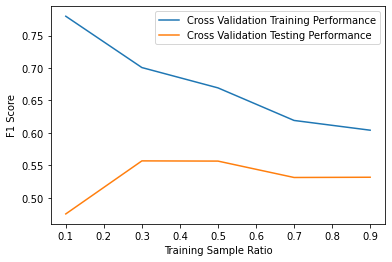

In [53]:
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('F1 Score')